In [1]:
import pandas as pd

# Load the Titanic dataset (file must be uploaded manually first)
df = pd.read_csv('train.csv')

# View first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:

# Check for missing values
df.isnull().sum()



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
# Drop columns that are not helpful for analysis
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Confirm there are no missing values
df.isnull().sum()


<ipython-input-3-2689367250>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-2689367250>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [4]:
# Convert 'Sex': male = 0, female = 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked': S = 0, C = 1, Q = 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better style
sns.set(style="darkgrid")


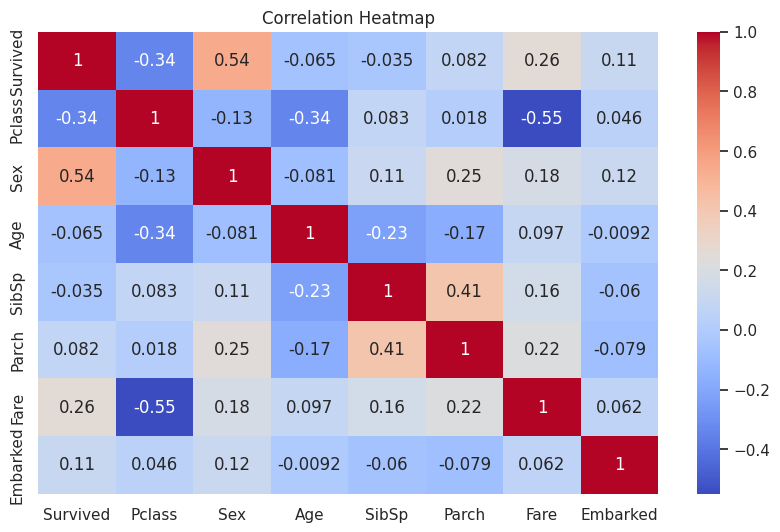

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


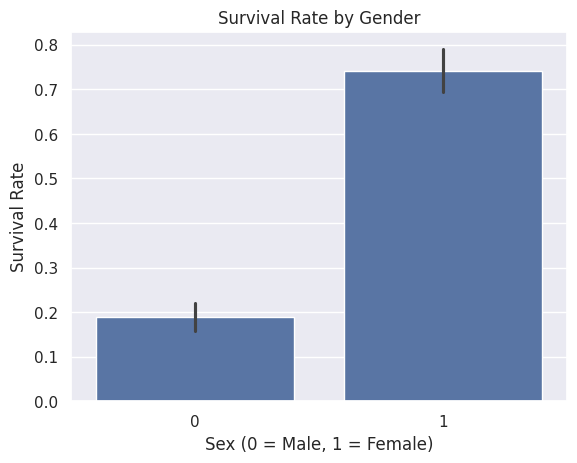

In [7]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Survival Rate")
plt.show()


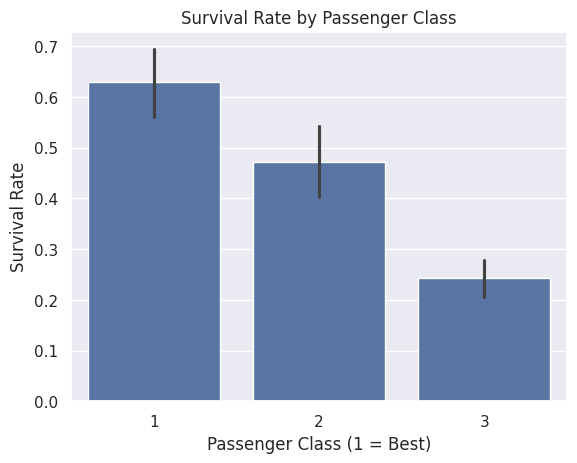

In [8]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class (1 = Best)")
plt.ylabel("Survival Rate")
plt.show()


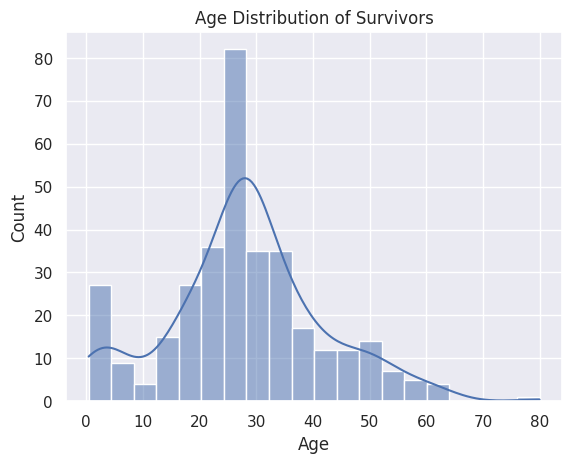

In [9]:
sns.histplot(data=df[df['Survived'] == 1], x='Age', bins=20, kde=True)
plt.title("Age Distribution of Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## 📝 Summary of Insights from Titanic Dataset (EDA)

- **Females had a much higher survival rate** compared to males.
- Passengers in **1st class survived more** often than those in 2nd or 3rd class.
- **Younger passengers (especially children)** had better chances of survival.
- People who **embarked from Cherbourg (Embarked = C)** had higher survival rates than those from other ports.

These insights show that gender, class, and age played an important role in survival during the Titanic disaster.
